In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.stats as stats
import pandas as pd


In [2]:
# read csv file into memory based lab1
images = np.genfromtxt("/Users/ozlemserifogullari/Documents/ENGR421/HW2/hw02_data_set_images.csv", delimiter = ",", skip_header = 0)

In [3]:
#creating data set
points1 = [images[i] for i in range(25)]
points2 = [images[i] for i in range(39,64)]
points3 = [images[i] for i in range(78,103)]
points4 = [images[i] for i in range(117, 117+25)]
points5 = [images[i] for i in range(156, 156+25)]

x = np.concatenate((points1, points2, points3,points4,points5))

In [4]:
#since the data lables are ordered (explained in homework description) it can be implemented as below
y = np.concatenate((np.repeat(1, 25), np.repeat(2, 25), np.repeat(3, 25), np.repeat(4, 25), np.repeat(5, 25)))
y_test = np.concatenate((np.repeat(1, 14), np.repeat(2, 14), np.repeat(3, 14), np.repeat(4, 14), np.repeat(5, 14)))

In [5]:
N = len(x) #number of data points
K = np.max(y) #number of classes
D = x[0].shape[0] #dimension of data vectors

In [6]:
#creating test cases
test_data = np.concatenate((np.copy(images[25:39]), np.copy(images[64:78]), np.copy(images[103:117]), np.copy(images[117+25:156]), np.copy(images[156+25:195])))

In [7]:
#y_truth values for training data
y_truth = np.zeros((N, K)).astype(int)
y_truth[range(N), y - 1] = 1

In [8]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [9]:
# derivative of the sigmoid function with respect to the equation inside of exp
def derivative_sigmoid(X,w,w0):
    return sigmoid(X, w, w0)*(1-sigmoid(X, w, w0))

In [10]:
# define the gradient functions
def gradient_w(X, y_truth, y_predicted):
    return(np.asarray([-np.matmul((y_truth[:,c] - y_predicted[:,c])*derivative_sigmoid(X,w,w0)[:,c], X) for c in range(K)]).transpose())

def gradient_w0(y_truth, y_predicted):
    return(-np.sum((y_truth - y_predicted)*(y_predicted)*(1 - y_predicted), axis = 0))

In [11]:
# set learning parameters
eta = 0.001
epsilon = 0.001

In [12]:
# randomly initalize w and w0
np.random.seed(521)
w = np.random.uniform(low = -0.01, high = 0.01, size = (D,K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1,K))

In [13]:
# learn w and w0 using gradient descent
iteration = 1
objective_values = []
while True:
    y_predicted = sigmoid(x, w, w0)
    
    objective_values = np.append(objective_values, 0.5*np.sum((y_truth-y_predicted)**2))

    w_old = w
    w0_old = w0

    w = w - eta * gradient_w(x, y_truth, y_predicted)
    w0 = w0 - eta * gradient_w0(y_truth, y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((w - w_old)**2)) < epsilon:
        break

    iteration = iteration + 1
print(w)
print(w0)

[[-0.00728541 -0.04717805 -0.0064784   0.11853905 -0.0201066 ]
 [-0.07204392  0.01709467 -0.12557301  0.19249038  0.03612131]
 [-0.07021928  0.05251612 -0.12856793  0.14121555  0.03373028]
 ...
 [ 0.02958495  0.13190939  0.04029442 -0.1382699  -0.12186406]
 [ 0.05515989 -0.1582695   0.04774339 -0.18321361 -0.02011078]
 [ 0.07315547 -0.24020322  0.08474811 -0.1491183  -0.01616374]]
[[-0.05083666 -0.16558016 -0.00297532 -0.03719019 -0.15879033]]


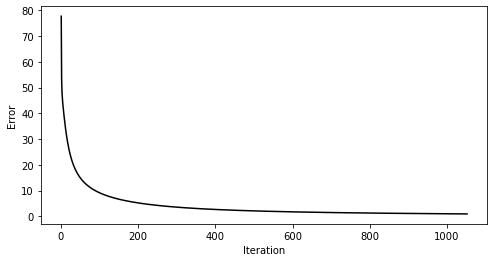

In [14]:
#Draw the objective function values
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [15]:
# calculate confusion matrix for training data
y_predicted_classes = np.argmax(y_predicted, axis = 1) + 1
y_truth_classes = np.argmax(y_truth, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted_classes, y_truth_classes, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


In [16]:
y_predicted = sigmoid(test_data, w, w0)
y_predicted_classes = np.argmax(y_predicted, axis = 1) + 1
#change y_truth to test data
y_truth = np.zeros((len(y_test), K)).astype(int)
y_truth[range(len(y_test)), y_test - 1] = 1
y_truth_classes = np.argmax(y_truth, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted_classes, y_truth_classes, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)


y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   2
3         0   0  14   0   0
4         0   0   0  14   0
5         0   2   0   0  12
